<a href="https://colab.research.google.com/github/csaiprashant/Docker/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [1]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2020-05-22 21:52:18--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2020-05-22 21:52:19 (41.1 MB/s) - ‘moore.csv’ saved [2302/2302]



In [0]:
data = pd.read_csv('moore.csv', header=None).values
X = data[:,0].reshape(-1,1)
y = data[:,1]

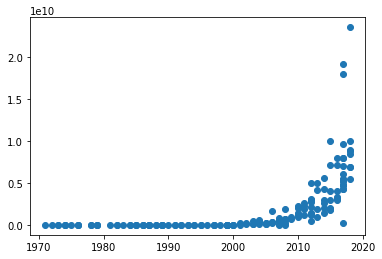

In [18]:
plt.scatter(X, y)

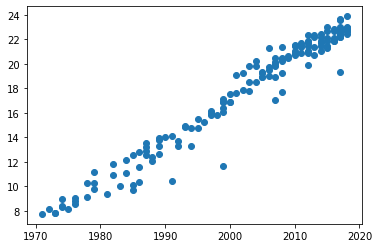

In [19]:
y = np.log(y)
plt.scatter(X, y)

In [0]:
X = X - X.mean()

In [24]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(1,)))
model.add(tf.keras.layers.Dense(1))

model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss='mse')

def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

r = model.fit(X, y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 0s 2ms/step - loss: 409.8849 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 2ms/step - loss: 372.0362 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 2ms/step - loss: 290.7209 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 2ms/step - loss: 192.0280 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 187.6395 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 1ms/step - loss: 118.9569 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 2ms/step - loss: 94.4592 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 2ms/step - loss: 72.5526 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 2ms/step - loss: 55.3899 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 1ms/step - loss: 34.6724 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 2ms/step - loss: 3

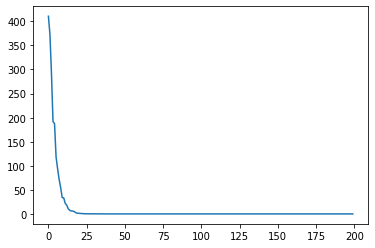

In [25]:
plt.plot(r.history['loss'], label='loss')

In [26]:
print(model.layers)
print(model.layers[0].get_weights())

[array([[0.34385434]], dtype=float32), array([17.775196], dtype=float32)]


In [33]:
a = model.layers[0].get_weights()[0][0, 0]
a

0.34385434